In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa import stattools

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['axes.grid'] = False

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize': (16., 12.)})

In [2]:
df = pd.read_excel('./countries_gas.xlsx', index_col=0)

In [3]:
df

,USA,"Japan,South Korea",Eupora
Date,,,
1984-01-01,59191.20,3158.67,33524.59
1984-02-01,49898.24,2902.67,32041.52
1984-03-01,53440.16,3397.67,30465.52
1984-04-01,41004.24,3065.67,23029.52
1984-05-01,35196.24,2932.67,19727.56
...,...,...,...
2020-08-01,65728.00,12880.00,28154.50
2020-09-01,57408.00,11753.00,32761.60
2020-10-01,61568.00,12075.00,37880.60


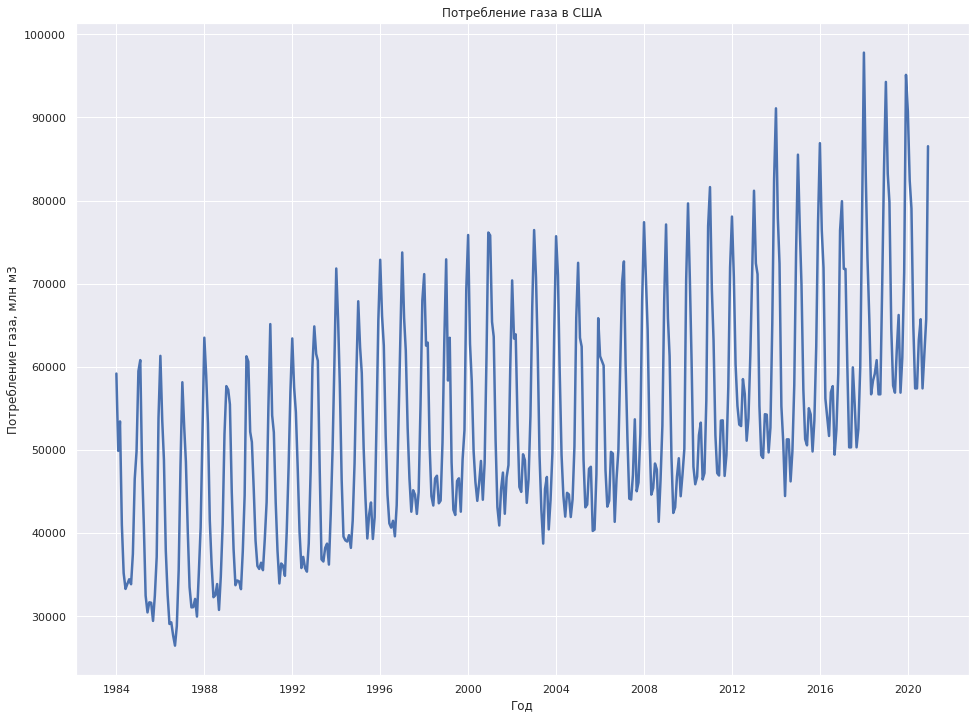

In [4]:
ax = sns.lineplot(data=df['USA'], palette='tab10', linewidth=2.5)
ax.set(xlabel='Год', ylabel='Потребление газа, млн м3', title='Потребление газа в США')
plt.show()

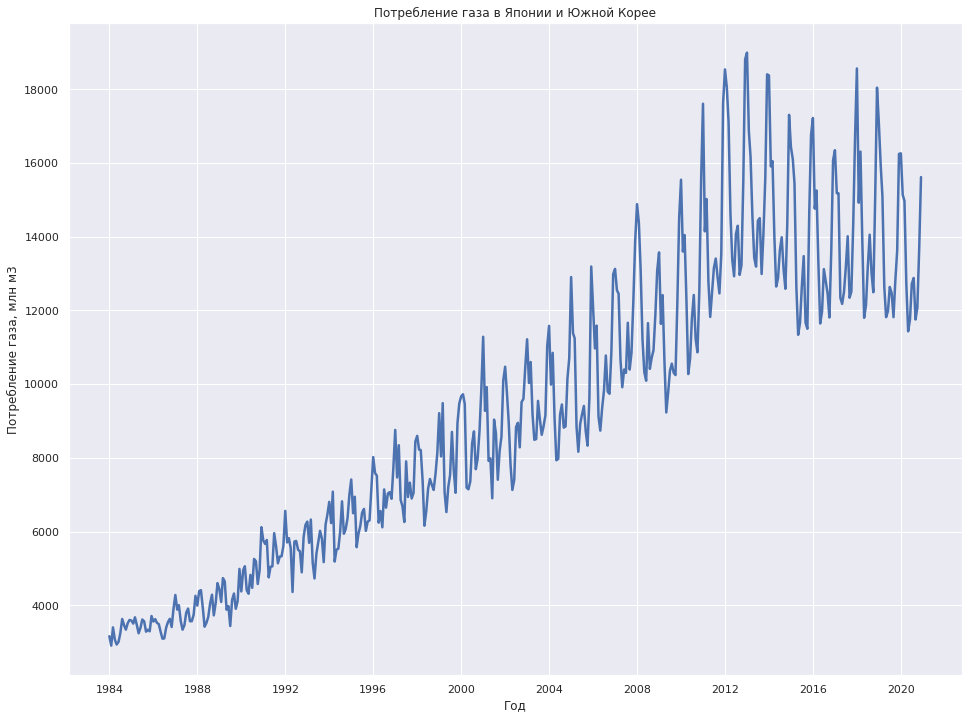

In [5]:
ax = sns.lineplot(data=df['Japan,South Korea'], palette='tab10', linewidth=2.5)
ax.set(xlabel='Год', ylabel='Потребление газа, млн м3', title='Потребление газа в Японии и Южной Корее')
plt.show()

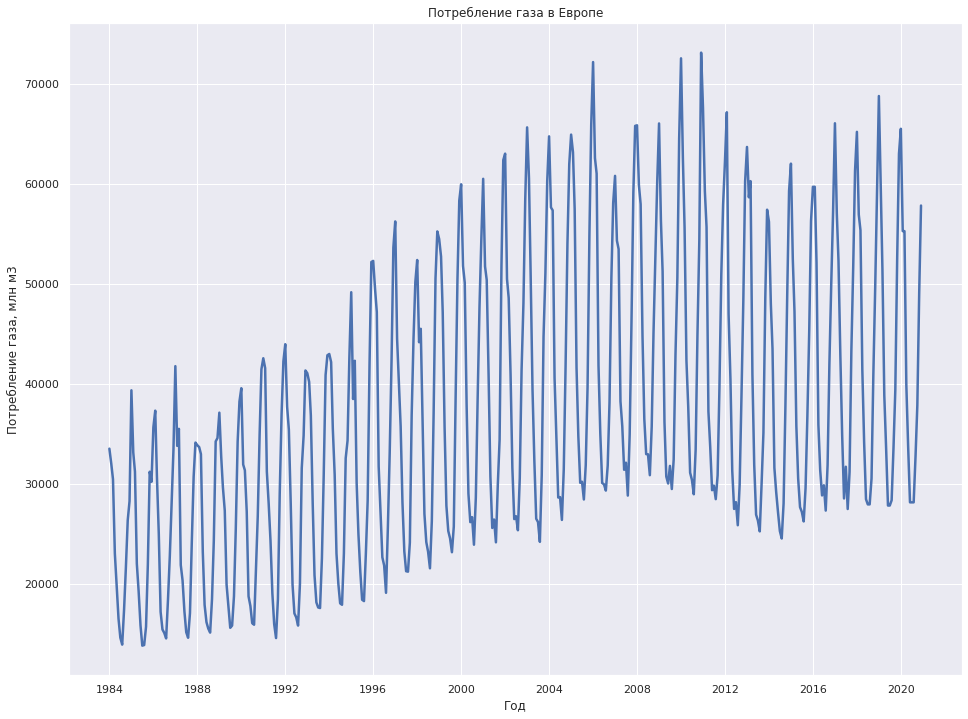

In [6]:
ax = sns.lineplot(data=df['Eupora'], palette='tab10', linewidth=2.5)
ax.set(xlabel='Год', ylabel='Потребление газа, млн м3', title='Потребление газа в Европе')
plt.show()

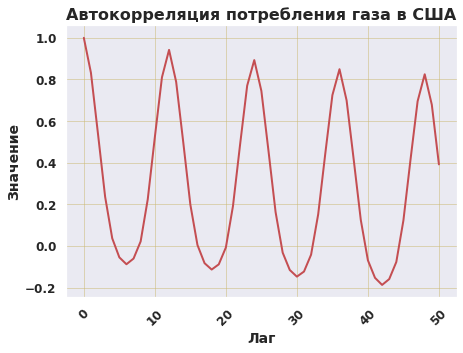

In [7]:
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(df['USA'],
                                                             adjusted=True,
                                                             nlags=50,
                                                             qstat=True,
                                                             fft=True,
                                                             alpha=0.05)

plt.figure(figsize=(7, 5))
plt.plot(pd.Series(acf_djia), color='r', linewidth=2)
plt.title('Автокорреляция потребления газа в США', weight='bold', fontsize=16)
plt.xlabel('Лаг', weight='bold', fontsize=14)
plt.ylabel('Значение', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth = 0.5)


In [8]:
# timestamp_s = df.index.map(pd.Timestamp.timestamp)


In [9]:
# months = 

In [10]:
# day = 24*60*60
# month = 
# year = (365.2425)*day
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
# df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
# df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))


# Модели

In [11]:
split_index = int(df.shape[0] * 0.8)

series = df['USA'].values
train_data = df['USA'][:split_index].values
test_data = df['USA'][split_index:].values

time_train = df['USA'][:split_index].index
time_test = df.index.values[split_index:]
x_valid = df['USA'][split_index:].values

In [12]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [13]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [14]:
window_size = 12
batch_size = 8
shuffle_buffer_size = 1000

dataset = windowed_dataset(train_data, window_size, batch_size, shuffle_buffer_size)
validation_ds = windowed_dataset(test_data, window_size, batch_size, shuffle_buffer_size)

In [15]:
list(dataset.take(1).as_numpy_iterator())

[(array([[44633.42, 45421.42, 48376.42, 47648.42, 41365.42, 46315.42,
          52912.42, 67933.42, 77120.16, 65880.16, 61300.16, 49148.16],
         [46584.16, 46910.24, 43591.2 , 43917.12, 50881.12, 63090.24,
          72926.92, 58355.92, 63495.92, 48527.92, 42817.92, 42189.92],
         [48187.17, 60052.17, 70393.92, 63406.92, 63906.92, 53185.92,
          45559.92, 44966.92, 49484.92, 48776.92, 43646.92, 46509.92],
         [32483.  , 37157.  , 53871.  , 61321.76, 53558.72, 48826.72,
          37892.8 , 32623.76, 29082.8 , 29280.8 , 27694.8 , 26476.8 ],
         [34199.2 , 33268.24, 37803.2 , 44532.16, 61268.16, 60627.92,
          52189.92, 50962.92, 45298.92, 39112.92, 36057.92, 35701.92],
         [61213.44, 76153.44, 75809.17, 65408.17, 63630.17, 51193.17,
          43133.17, 40926.17, 45275.17, 47288.17, 42334.17, 46719.17],
         [52230.67, 63505.67, 59002.67, 53197.67, 41530.67, 36236.67,
          32299.67, 32525.67, 33885.67, 30770.67, 34820.67, 41049.67],
         [467

In [ ]:
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam())
history = model.fit(dataset,
                    validation_data=validation_ds,
                    epochs=1000, verbose=1)

In [16]:
def plot_history(history, metrics=['loss', 'val_loss'], offset=0):
    for metric in metrics:
        plt.plot(history.history[metric][offset:], label=metric)
    plt.legend()
    plt.show()

In [ ]:
plot_history(history, offset=100)

In [17]:
def forecast(model, plot=True):
    forecast = []

    for time in range(len(series) - window_size):
        forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

    forecast = forecast[split_index-window_size:]
    results = np.array(forecast)[:, 0, 0]

    if plot:
        plt.plot(time_train, train_data, 'g', label='Фактические данные')
        plt.plot(time_test, test_data, marker='.', label='Прогнозируемые реальные данные')
        plt.plot(time_test, results, 'r', label='Прогноз')
        plt.ylabel('Объем потребления газа')
        plt.xlabel('Время')
        plt.legend()
        plt.show(); 
        
        # Scale predictions
        plt.plot(time_test, test_data, marker='.', label="true")
        plt.plot(time_test, results, 'r', label="prediction")
        plt.ylabel('Value')
        plt.xlabel('Time Step')
        plt.legend()
        plt.show();        
    return results

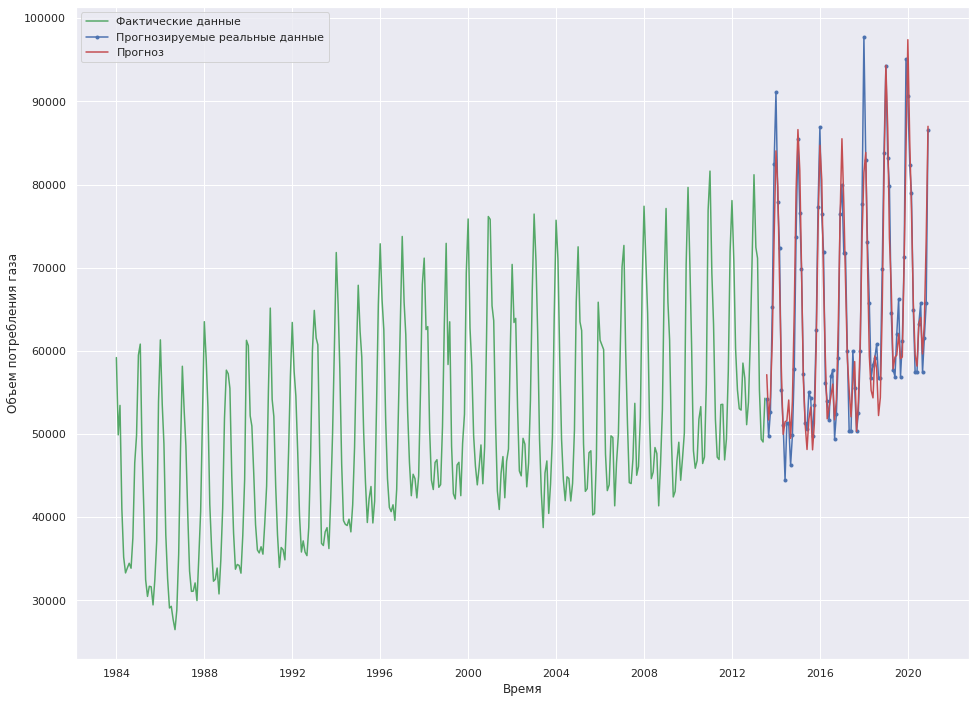

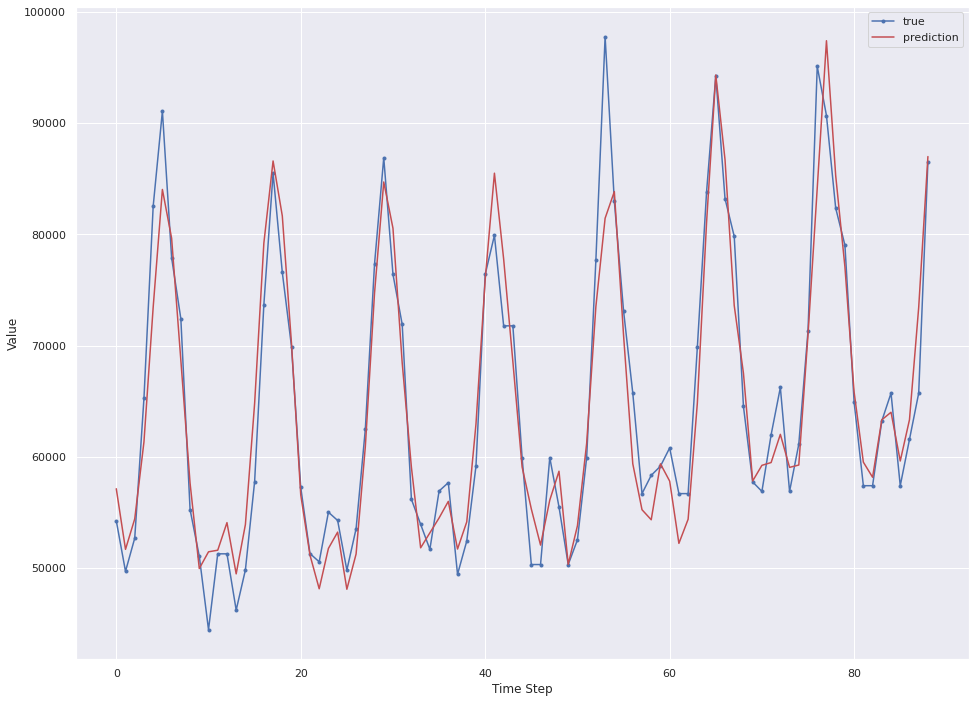

In [17]:
results = forecast(model)

In [56]:
print('MAE:', tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())
print('MAPE:', tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy())

MAE: 2327.5972
MAPE: 3.6376872


In [44]:
model = tf.keras.models.Sequential([
    layers.Dense(32, input_shape=[window_size], activation='relu'), 
#     layers.Dropout(0.5),
    layers.Dense(32, activation='relu'), 
#     layers.Dropout(0.5),    
#     layers.Dense(32, activation='relu'), 
#     layers.Dropout(0.5),
    layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam())
history = model.fit(dataset, 
                    validation_data=validation_ds,
                    epochs=2500, verbose=1)

Epoch 1/2500
43/43 [==============================] - 0s 2ms/step - loss: 314006976.0000 - val_loss: 125977560.0000
Epoch 2/2500
43/43 [==============================] - 0s 1ms/step - loss: 68375824.0000 - val_loss: 70767184.0000
Epoch 3/2500
43/43 [==============================] - 0s 999us/step - loss: 40087056.0000 - val_loss: 45094496.0000
Epoch 4/2500
43/43 [==============================] - 0s 1ms/step - loss: 24049744.0000 - val_loss: 42501732.0000
Epoch 5/2500
43/43 [==============================] - 0s 1ms/step - loss: 18454372.0000 - val_loss: 23629078.0000
Epoch 6/2500
43/43 [==============================] - 0s 1ms/step - loss: 14678197.0000 - val_loss: 20664252.0000
Epoch 7/2500
43/43 [==============================] - 0s 1ms/step - loss: 12205166.0000 - val_loss: 21040090.0000
Epoch 8/2500
43/43 [==============================] - 0s 1ms/step - loss: 11197263.0000 - val_loss: 17248622.0000
Epoch 9/2500
43/43 [==============================] - 0s 1ms/step - loss: 10779585.0

43/43 [==============================] - 0s 1ms/step - loss: 6590859.5000 - val_loss: 10619793.0000
Epoch 144/2500
43/43 [==============================] - 0s 977us/step - loss: 7009186.0000 - val_loss: 12354638.0000
Epoch 145/2500
43/43 [==============================] - 0s 1ms/step - loss: 8246367.5000 - val_loss: 13149636.0000
Epoch 146/2500
43/43 [==============================] - 0s 1ms/step - loss: 8838638.0000 - val_loss: 11376827.0000
Epoch 147/2500
43/43 [==============================] - 0s 987us/step - loss: 7094018.0000 - val_loss: 10318732.0000
Epoch 148/2500
43/43 [==============================] - 0s 1ms/step - loss: 7156439.0000 - val_loss: 12301231.0000
Epoch 149/2500
43/43 [==============================] - 0s 1ms/step - loss: 6533236.5000 - val_loss: 10270408.0000
Epoch 150/2500
43/43 [==============================] - 0s 1ms/step - loss: 6570604.0000 - val_loss: 9979505.0000
Epoch 151/2500
43/43 [==============================] - 0s 1ms/step - loss: 6943777.0000 - v

43/43 [==============================] - 0s 1ms/step - loss: 6503939.5000 - val_loss: 11503102.0000
Epoch 215/2500
43/43 [==============================] - 0s 1ms/step - loss: 6067174.5000 - val_loss: 11812000.0000
Epoch 216/2500
43/43 [==============================] - 0s 1ms/step - loss: 6288349.0000 - val_loss: 12557342.0000
Epoch 217/2500
43/43 [==============================] - 0s 1ms/step - loss: 6548776.5000 - val_loss: 10025954.0000
Epoch 218/2500
43/43 [==============================] - 0s 1ms/step - loss: 6096371.5000 - val_loss: 11995568.0000
Epoch 219/2500
43/43 [==============================] - 0s 1ms/step - loss: 6140061.0000 - val_loss: 9826220.0000
Epoch 220/2500
43/43 [==============================] - 0s 1ms/step - loss: 6328491.0000 - val_loss: 10327160.0000
Epoch 221/2500
43/43 [==============================] - 0s 1ms/step - loss: 5857350.0000 - val_loss: 10108387.0000
Epoch 222/2500
43/43 [==============================] - 0s 1ms/step - loss: 6230944.5000 - val_l

43/43 [==============================] - 0s 1ms/step - loss: 5699011.0000 - val_loss: 10890110.0000
Epoch 286/2500
43/43 [==============================] - 0s 1ms/step - loss: 6577682.0000 - val_loss: 17970170.0000
Epoch 287/2500
43/43 [==============================] - 0s 1ms/step - loss: 6921186.0000 - val_loss: 9155300.0000
Epoch 288/2500
43/43 [==============================] - 0s 1ms/step - loss: 6272250.0000 - val_loss: 12282572.0000
Epoch 289/2500
43/43 [==============================] - 0s 1ms/step - loss: 5889548.5000 - val_loss: 9246084.0000
Epoch 290/2500
43/43 [==============================] - 0s 1ms/step - loss: 5727075.5000 - val_loss: 9517005.0000
Epoch 291/2500
43/43 [==============================] - 0s 1ms/step - loss: 6310921.0000 - val_loss: 10336260.0000
Epoch 292/2500
43/43 [==============================] - 0s 1ms/step - loss: 5911763.0000 - val_loss: 9357666.0000
Epoch 293/2500
43/43 [==============================] - 0s 1ms/step - loss: 6332083.0000 - val_loss

43/43 [==============================] - 0s 1ms/step - loss: 5453705.5000 - val_loss: 9520574.0000
Epoch 428/2500
43/43 [==============================] - 0s 1ms/step - loss: 5050770.5000 - val_loss: 11630015.0000
Epoch 429/2500
43/43 [==============================] - 0s 1ms/step - loss: 6572977.5000 - val_loss: 9713546.0000
Epoch 430/2500
43/43 [==============================] - 0s 1ms/step - loss: 6994491.5000 - val_loss: 8775019.0000
Epoch 431/2500
43/43 [==============================] - 0s 1ms/step - loss: 5469009.5000 - val_loss: 9983630.0000
Epoch 432/2500
43/43 [==============================] - 0s 1ms/step - loss: 5360199.5000 - val_loss: 10489297.0000
Epoch 433/2500
43/43 [==============================] - 0s 1ms/step - loss: 5114648.5000 - val_loss: 9507722.0000
Epoch 434/2500
43/43 [==============================] - 0s 1ms/step - loss: 5127444.5000 - val_loss: 9705517.0000
Epoch 435/2500
43/43 [==============================] - 0s 1ms/step - loss: 5032938.0000 - val_loss: 

43/43 [==============================] - 0s 1ms/step - loss: 6049435.0000 - val_loss: 11189928.0000
Epoch 570/2500
43/43 [==============================] - 0s 1ms/step - loss: 4718650.5000 - val_loss: 10706155.0000
Epoch 571/2500
43/43 [==============================] - 0s 1ms/step - loss: 5883620.0000 - val_loss: 8920295.0000
Epoch 572/2500
43/43 [==============================] - 0s 2ms/step - loss: 4895245.5000 - val_loss: 13000472.0000
Epoch 573/2500
43/43 [==============================] - 0s 989us/step - loss: 5189530.0000 - val_loss: 8644003.0000
Epoch 574/2500
43/43 [==============================] - 0s 1ms/step - loss: 5022645.5000 - val_loss: 8476644.0000
Epoch 575/2500
43/43 [==============================] - 0s 1ms/step - loss: 5103427.0000 - val_loss: 9493029.0000
Epoch 576/2500
43/43 [==============================] - 0s 1ms/step - loss: 4881845.0000 - val_loss: 9093249.0000
Epoch 577/2500
43/43 [==============================] - 0s 989us/step - loss: 4514867.5000 - val_l

43/43 [==============================] - 0s 1ms/step - loss: 4690434.0000 - val_loss: 9480044.0000
Epoch 712/2500
43/43 [==============================] - 0s 1ms/step - loss: 4708995.5000 - val_loss: 10449628.0000
Epoch 713/2500
43/43 [==============================] - 0s 1ms/step - loss: 4699132.0000 - val_loss: 16730740.0000
Epoch 714/2500
43/43 [==============================] - 0s 1ms/step - loss: 4743140.0000 - val_loss: 12601687.0000
Epoch 715/2500
43/43 [==============================] - 0s 1ms/step - loss: 5001970.0000 - val_loss: 9380030.0000
Epoch 716/2500
43/43 [==============================] - 0s 1ms/step - loss: 4455604.0000 - val_loss: 8863689.0000
Epoch 717/2500
43/43 [==============================] - 0s 1ms/step - loss: 4520231.0000 - val_loss: 8322477.5000
Epoch 718/2500
43/43 [==============================] - 0s 1ms/step - loss: 4049066.5000 - val_loss: 10369296.0000
Epoch 719/2500
43/43 [==============================] - 0s 1ms/step - loss: 4760105.0000 - val_loss

43/43 [==============================] - 0s 1ms/step - loss: 3763120.2500 - val_loss: 10165314.0000
Epoch 854/2500
43/43 [==============================] - 0s 986us/step - loss: 3896292.5000 - val_loss: 9251849.0000
Epoch 855/2500
43/43 [==============================] - 0s 1ms/step - loss: 3905505.5000 - val_loss: 9644218.0000
Epoch 856/2500
43/43 [==============================] - 0s 1ms/step - loss: 4147513.0000 - val_loss: 11316009.0000
Epoch 857/2500
43/43 [==============================] - 0s 965us/step - loss: 4643381.0000 - val_loss: 14068969.0000
Epoch 858/2500
43/43 [==============================] - 0s 1ms/step - loss: 4312062.0000 - val_loss: 8721930.0000
Epoch 859/2500
43/43 [==============================] - 0s 1ms/step - loss: 4002707.0000 - val_loss: 8952790.0000
Epoch 860/2500
43/43 [==============================] - 0s 993us/step - loss: 4020074.2500 - val_loss: 8223018.5000
Epoch 861/2500
43/43 [==============================] - 0s 978us/step - loss: 3986261.5000 - v

43/43 [==============================] - 0s 1ms/step - loss: 3422043.7500 - val_loss: 12650007.0000
Epoch 996/2500
43/43 [==============================] - 0s 992us/step - loss: 4184976.0000 - val_loss: 8613664.0000
Epoch 997/2500
43/43 [==============================] - 0s 996us/step - loss: 3417120.5000 - val_loss: 8987882.0000
Epoch 998/2500
43/43 [==============================] - 0s 989us/step - loss: 3222495.5000 - val_loss: 8845091.0000
Epoch 999/2500
43/43 [==============================] - 0s 980us/step - loss: 3644531.2500 - val_loss: 9240539.0000
Epoch 1000/2500
43/43 [==============================] - 0s 1ms/step - loss: 3616233.2500 - val_loss: 9833669.0000
Epoch 1001/2500
43/43 [==============================] - 0s 996us/step - loss: 3733782.0000 - val_loss: 10122612.0000
Epoch 1002/2500
43/43 [==============================] - 0s 983us/step - loss: 3788009.5000 - val_loss: 9097846.0000
Epoch 1003/2500
43/43 [==============================] - 0s 1ms/step - loss: 3803329.0

43/43 [==============================] - 0s 1ms/step - loss: 4000314.5000 - val_loss: 8420056.0000
Epoch 1136/2500
43/43 [==============================] - 0s 1000us/step - loss: 3493066.2500 - val_loss: 9384682.0000
Epoch 1137/2500
43/43 [==============================] - 0s 1ms/step - loss: 3022829.7500 - val_loss: 10009813.0000
Epoch 1138/2500
43/43 [==============================] - 0s 986us/step - loss: 3726080.7500 - val_loss: 9183557.0000
Epoch 1139/2500
43/43 [==============================] - 0s 1ms/step - loss: 3777311.0000 - val_loss: 13860737.0000
Epoch 1140/2500
43/43 [==============================] - 0s 1ms/step - loss: 4070989.5000 - val_loss: 12614537.0000
Epoch 1141/2500
43/43 [==============================] - 0s 1ms/step - loss: 3583065.2500 - val_loss: 10355846.0000
Epoch 1142/2500
43/43 [==============================] - 0s 1ms/step - loss: 3484500.7500 - val_loss: 8896371.0000
Epoch 1143/2500
43/43 [==============================] - 0s 1ms/step - loss: 3725614.00

43/43 [==============================] - 0s 998us/step - loss: 3229214.2500 - val_loss: 8878958.0000
Epoch 1276/2500
43/43 [==============================] - 0s 988us/step - loss: 3358938.0000 - val_loss: 10706167.0000
Epoch 1277/2500
43/43 [==============================] - 0s 1ms/step - loss: 3258910.5000 - val_loss: 10055179.0000
Epoch 1278/2500
43/43 [==============================] - 0s 994us/step - loss: 3364459.5000 - val_loss: 12794125.0000
Epoch 1279/2500
43/43 [==============================] - 0s 979us/step - loss: 3510719.7500 - val_loss: 9156054.0000
Epoch 1280/2500
43/43 [==============================] - 0s 1ms/step - loss: 3018839.2500 - val_loss: 10643952.0000
Epoch 1281/2500
43/43 [==============================] - 0s 1ms/step - loss: 3753587.0000 - val_loss: 8896027.0000
Epoch 1282/2500
43/43 [==============================] - 0s 983us/step - loss: 3008825.0000 - val_loss: 8696024.0000
Epoch 1283/2500
43/43 [==============================] - 0s 975us/step - loss: 294

Epoch 1346/2500
43/43 [==============================] - 0s 981us/step - loss: 3318499.2500 - val_loss: 10318001.0000
Epoch 1347/2500
43/43 [==============================] - 0s 979us/step - loss: 3464362.5000 - val_loss: 15147166.0000
Epoch 1348/2500
43/43 [==============================] - 0s 1ms/step - loss: 3191161.7500 - val_loss: 11324384.0000
Epoch 1349/2500
43/43 [==============================] - 0s 1ms/step - loss: 3396212.7500 - val_loss: 10069846.0000
Epoch 1350/2500
43/43 [==============================] - 0s 1ms/step - loss: 2938722.2500 - val_loss: 9279072.0000
Epoch 1351/2500
43/43 [==============================] - 0s 1ms/step - loss: 3248145.5000 - val_loss: 9062102.0000
Epoch 1352/2500
43/43 [==============================] - 0s 977us/step - loss: 3010137.7500 - val_loss: 9336902.0000
Epoch 1353/2500
43/43 [==============================] - 0s 1ms/step - loss: 2998922.7500 - val_loss: 9568022.0000
Epoch 1354/2500
43/43 [==============================] - 0s 1ms/step -

43/43 [==============================] - 0s 994us/step - loss: 3012040.2500 - val_loss: 9196499.0000
Epoch 1487/2500
43/43 [==============================] - 0s 1ms/step - loss: 3070714.0000 - val_loss: 9968659.0000
Epoch 1488/2500
43/43 [==============================] - 0s 1ms/step - loss: 3314933.5000 - val_loss: 11813531.0000
Epoch 1489/2500
43/43 [==============================] - 0s 1ms/step - loss: 3466284.7500 - val_loss: 10204846.0000
Epoch 1490/2500
43/43 [==============================] - 0s 1ms/step - loss: 2952028.7500 - val_loss: 11646437.0000
Epoch 1491/2500
43/43 [==============================] - 0s 1ms/step - loss: 3206458.2500 - val_loss: 9472130.0000
Epoch 1492/2500
43/43 [==============================] - 0s 990us/step - loss: 3710729.0000 - val_loss: 8763553.0000
Epoch 1493/2500
43/43 [==============================] - 0s 1ms/step - loss: 3762354.0000 - val_loss: 9475701.0000
Epoch 1494/2500
43/43 [==============================] - 0s 1ms/step - loss: 2786680.0000

Epoch 1557/2500
43/43 [==============================] - 0s 1ms/step - loss: 2660363.5000 - val_loss: 10183052.0000
Epoch 1558/2500
43/43 [==============================] - 0s 1ms/step - loss: 3095813.0000 - val_loss: 8944805.0000
Epoch 1559/2500
43/43 [==============================] - 0s 1ms/step - loss: 3342510.0000 - val_loss: 10862358.0000
Epoch 1560/2500
43/43 [==============================] - 0s 984us/step - loss: 3323933.7500 - val_loss: 10365335.0000
Epoch 1561/2500
43/43 [==============================] - 0s 1ms/step - loss: 3319086.7500 - val_loss: 9709098.0000
Epoch 1562/2500
43/43 [==============================] - 0s 998us/step - loss: 2892086.0000 - val_loss: 11307838.0000
Epoch 1563/2500
43/43 [==============================] - 0s 990us/step - loss: 2905447.2500 - val_loss: 11521199.0000
Epoch 1564/2500
43/43 [==============================] - 0s 1ms/step - loss: 2954822.7500 - val_loss: 10233928.0000
Epoch 1565/2500
43/43 [==============================] - 0s 1ms/step

Epoch 1698/2500
43/43 [==============================] - 0s 1ms/step - loss: 2592069.5000 - val_loss: 10639515.0000
Epoch 1699/2500
43/43 [==============================] - 0s 1ms/step - loss: 2643521.0000 - val_loss: 9267010.0000
Epoch 1700/2500
43/43 [==============================] - 0s 1ms/step - loss: 2606733.0000 - val_loss: 10173338.0000
Epoch 1701/2500
43/43 [==============================] - 0s 1ms/step - loss: 3313021.5000 - val_loss: 10823143.0000
Epoch 1702/2500
43/43 [==============================] - 0s 1ms/step - loss: 3047030.5000 - val_loss: 13513700.0000
Epoch 1703/2500
43/43 [==============================] - 0s 1ms/step - loss: 3202758.5000 - val_loss: 11701547.0000
Epoch 1704/2500
43/43 [==============================] - 0s 1ms/step - loss: 2691055.7500 - val_loss: 10367303.0000
Epoch 1705/2500
43/43 [==============================] - 0s 1000us/step - loss: 2770593.2500 - val_loss: 9439105.0000
Epoch 1706/2500
43/43 [==============================] - 0s 991us/step 

Epoch 1839/2500
43/43 [==============================] - 0s 1ms/step - loss: 3858992.5000 - val_loss: 11568908.0000
Epoch 1840/2500
43/43 [==============================] - 0s 1ms/step - loss: 2603702.2500 - val_loss: 10737970.0000
Epoch 1841/2500
43/43 [==============================] - 0s 1ms/step - loss: 2653436.2500 - val_loss: 9600234.0000
Epoch 1842/2500
43/43 [==============================] - 0s 1ms/step - loss: 2163005.5000 - val_loss: 8911056.0000
Epoch 1843/2500
43/43 [==============================] - 0s 1ms/step - loss: 2528957.0000 - val_loss: 8957765.0000
Epoch 1844/2500
43/43 [==============================] - 0s 1ms/step - loss: 2676619.0000 - val_loss: 10097185.0000
Epoch 1845/2500
43/43 [==============================] - 0s 1ms/step - loss: 2086630.7500 - val_loss: 10192088.0000
Epoch 1846/2500
43/43 [==============================] - 0s 1ms/step - loss: 2376369.2500 - val_loss: 10009325.0000
Epoch 1847/2500
43/43 [==============================] - 0s 1ms/step - loss

43/43 [==============================] - 0s 1ms/step - loss: 2295876.2500 - val_loss: 13290052.0000
Epoch 1980/2500
43/43 [==============================] - 0s 1ms/step - loss: 2704182.7500 - val_loss: 9091189.0000
Epoch 1981/2500
43/43 [==============================] - 0s 1ms/step - loss: 2236974.2500 - val_loss: 9599345.0000
Epoch 1982/2500
43/43 [==============================] - 0s 989us/step - loss: 2148440.7500 - val_loss: 9245408.0000
Epoch 1983/2500
43/43 [==============================] - 0s 959us/step - loss: 3819513.7500 - val_loss: 10707839.0000
Epoch 1984/2500
43/43 [==============================] - 0s 1ms/step - loss: 3777933.0000 - val_loss: 10179587.0000
Epoch 1985/2500
43/43 [==============================] - 0s 954us/step - loss: 2750586.2500 - val_loss: 9066184.0000
Epoch 1986/2500
43/43 [==============================] - 0s 966us/step - loss: 2344969.2500 - val_loss: 10519515.0000
Epoch 1987/2500
43/43 [==============================] - 0s 978us/step - loss: 27227

43/43 [==============================] - 0s 1ms/step - loss: 1834204.5000 - val_loss: 9359755.0000
Epoch 2120/2500
43/43 [==============================] - 0s 1ms/step - loss: 2049746.6250 - val_loss: 10965156.0000
Epoch 2121/2500
43/43 [==============================] - 0s 1ms/step - loss: 2293239.0000 - val_loss: 10791150.0000
Epoch 2122/2500
43/43 [==============================] - 0s 1ms/step - loss: 2253188.2500 - val_loss: 9503782.0000
Epoch 2123/2500
43/43 [==============================] - 0s 1ms/step - loss: 1920345.6250 - val_loss: 10033485.0000
Epoch 2124/2500
43/43 [==============================] - 0s 1ms/step - loss: 2018954.2500 - val_loss: 9916084.0000
Epoch 2125/2500
43/43 [==============================] - 0s 1ms/step - loss: 2339577.2500 - val_loss: 10120254.0000
Epoch 2126/2500
43/43 [==============================] - 0s 1ms/step - loss: 2261656.5000 - val_loss: 10350139.0000
Epoch 2127/2500
43/43 [==============================] - 0s 1ms/step - loss: 2025512.5000 -

Epoch 2190/2500
43/43 [==============================] - 0s 1ms/step - loss: 2492939.0000 - val_loss: 11263069.0000
Epoch 2191/2500
43/43 [==============================] - 0s 1ms/step - loss: 2281318.2500 - val_loss: 10694176.0000
Epoch 2192/2500
43/43 [==============================] - 0s 1ms/step - loss: 2172311.2500 - val_loss: 11016951.0000
Epoch 2193/2500
43/43 [==============================] - 0s 1ms/step - loss: 2862633.2500 - val_loss: 13815554.0000
Epoch 2194/2500
43/43 [==============================] - 0s 1ms/step - loss: 3824967.7500 - val_loss: 10288751.0000
Epoch 2195/2500
43/43 [==============================] - 0s 1ms/step - loss: 2510138.2500 - val_loss: 12572307.0000
Epoch 2196/2500
43/43 [==============================] - 0s 964us/step - loss: 2142837.2500 - val_loss: 8891663.0000
Epoch 2197/2500
43/43 [==============================] - 0s 967us/step - loss: 2190872.0000 - val_loss: 9677555.0000
Epoch 2198/2500
43/43 [==============================] - 0s 1ms/step -

43/43 [==============================] - 0s 1ms/step - loss: 2207530.5000 - val_loss: 10042058.0000
Epoch 2331/2500
43/43 [==============================] - 0s 996us/step - loss: 2177407.7500 - val_loss: 10354868.0000
Epoch 2332/2500
43/43 [==============================] - 0s 927us/step - loss: 1937459.1250 - val_loss: 11061552.0000
Epoch 2333/2500
43/43 [==============================] - 0s 1ms/step - loss: 1852234.8750 - val_loss: 10627055.0000
Epoch 2334/2500
43/43 [==============================] - 0s 993us/step - loss: 2120329.5000 - val_loss: 11850964.0000
Epoch 2335/2500
43/43 [==============================] - 0s 953us/step - loss: 2473271.0000 - val_loss: 11388966.0000
Epoch 2336/2500
43/43 [==============================] - 0s 971us/step - loss: 2093413.0000 - val_loss: 9096440.0000
Epoch 2337/2500
43/43 [==============================] - 0s 959us/step - loss: 2090179.8750 - val_loss: 11272322.0000
Epoch 2338/2500
43/43 [==============================] - 0s 982us/step - loss

43/43 [==============================] - 0s 966us/step - loss: 1973445.6250 - val_loss: 11847067.0000
Epoch 2471/2500
43/43 [==============================] - 0s 960us/step - loss: 2662331.7500 - val_loss: 10410108.0000
Epoch 2472/2500
43/43 [==============================] - 0s 937us/step - loss: 2086294.6250 - val_loss: 12049215.0000
Epoch 2473/2500
43/43 [==============================] - 0s 998us/step - loss: 2497386.2500 - val_loss: 10358445.0000
Epoch 2474/2500
43/43 [==============================] - 0s 1ms/step - loss: 2693660.2500 - val_loss: 9703116.0000
Epoch 2475/2500
43/43 [==============================] - 0s 1ms/step - loss: 2127555.5000 - val_loss: 10507663.0000
Epoch 2476/2500
43/43 [==============================] - 0s 1ms/step - loss: 1908132.3750 - val_loss: 10374087.0000
Epoch 2477/2500
43/43 [==============================] - 0s 945us/step - loss: 2368306.2500 - val_loss: 10829486.0000
Epoch 2478/2500
43/43 [==============================] - 0s 1ms/step - loss: 23

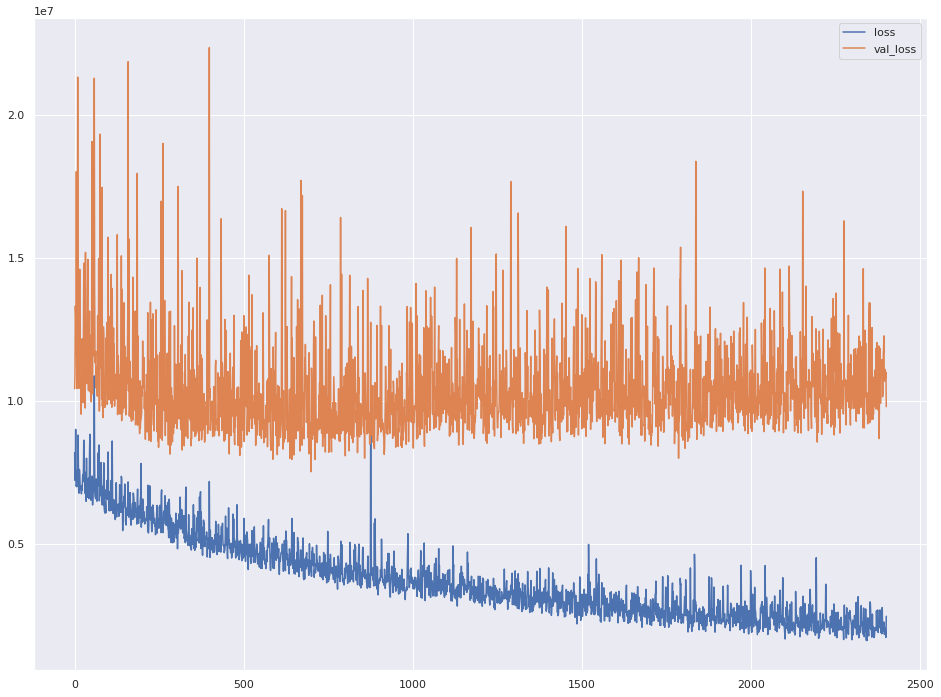

In [45]:
plot_history(history, offset=100)

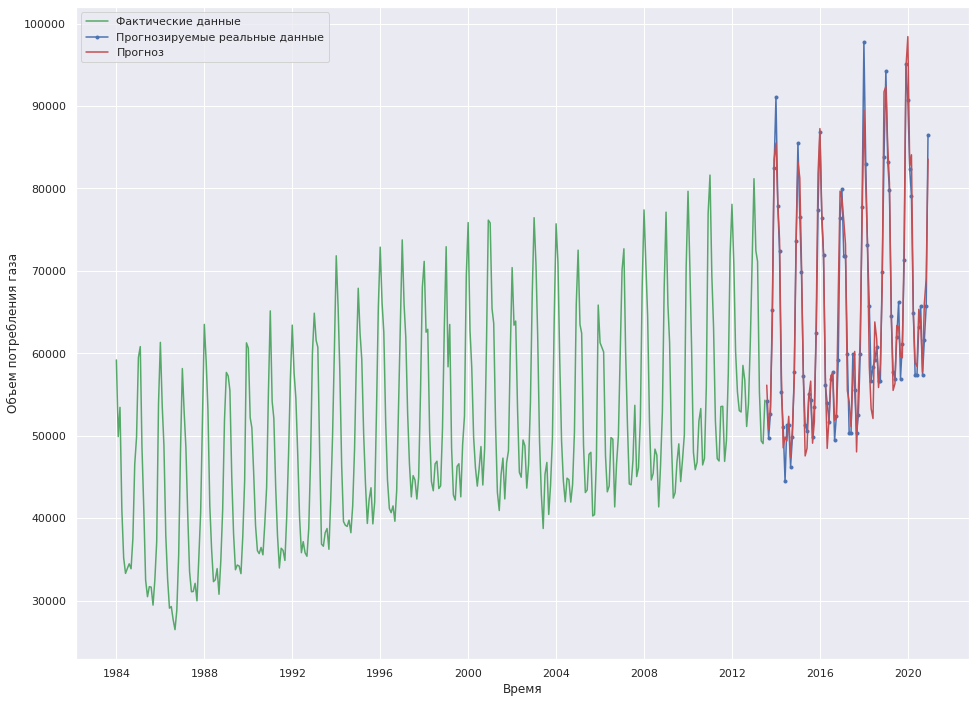

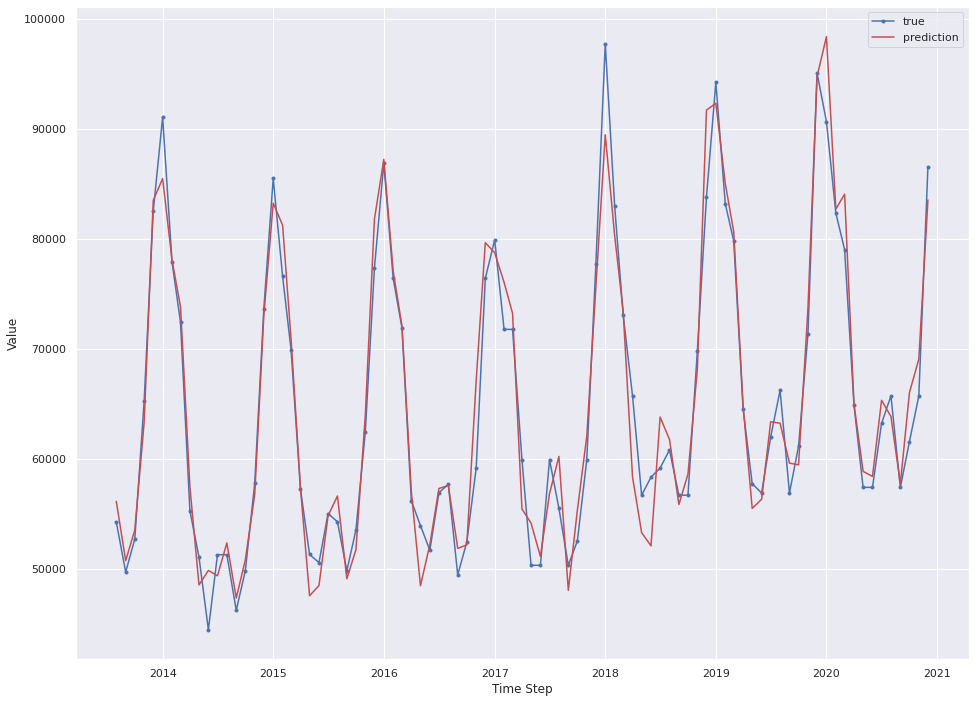

In [46]:
results = forecast(model)

In [55]:
print('MAE:', tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())
print('MAPE:', tf.keras.metrics.mean_absolute_percentage_error(x_valid, results).numpy())

MAE: 2327.5972
MAPE: 3.6376872


### LSTM

In [18]:
# https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/
def generate_rnn_series(series, n_input, batch_size):
    return TimeseriesGenerator(series, series, length=n_input, batch_size=batch_size)

In [29]:
n_features = 1
series_data = series.reshape((len(series), n_features))
generator = generate_rnn_series(series_data, 12, batch_size=1)

In [30]:
generator[0]

(array([[[59191.2 ],
         [49898.24],
         [53440.16],
         [41004.24],
         [35196.24],
         [33298.24],
         [33893.2 ],
         [34460.24],
         [33863.2 ],
         [37491.2 ],
         [46528.16],
         [49814.24]]]),
 array([[59480.]]))

In [36]:
model = tf.keras.models.Sequential([
     layers.LSTM(64, return_sequences=False),
#      layers.LSTM(32, return_sequences=False),
     layers.Dense(12),
     layers.Dense(1),
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam())
history = model.fit(generator, steps_per_epoch=100, epochs=1000,
#                      validation_data=validation_ds,
#                     epochs=2500, 
                    verbose=1)

# model.summary()

Epoch 1/1000
100/100 [==============================] - 1s 2ms/step - loss: 3165674496.0000
Epoch 2/1000
100/100 [==============================] - 0s 2ms/step - loss: 3105321728.0000
Epoch 3/1000
100/100 [==============================] - 0s 2ms/step - loss: 2823142144.0000
Epoch 4/1000
100/100 [==============================] - 0s 2ms/step - loss: 3183489280.0000
Epoch 5/1000
100/100 [==============================] - 0s 2ms/step - loss: 3178954752.0000
Epoch 6/1000
100/100 [==============================] - 0s 2ms/step - loss: 2824193280.0000
Epoch 7/1000
100/100 [==============================] - 0s 2ms/step - loss: 3210390784.0000
Epoch 8/1000
100/100 [==============================] - 0s 2ms/step - loss: 2936852736.0000
Epoch 9/1000
100/100 [==============================] - 0s 2ms/step - loss: 3224690432.0000
Epoch 10/1000
100/100 [==============================] - 0s 2ms/step - loss: 2834350336.0000
Epoch 11/1000
100/100 [==============================] - 0s 2ms/step - loss: 30

100/100 [==============================] - 0s 2ms/step - loss: 1166054912.0000
Epoch 90/1000
100/100 [==============================] - 0s 2ms/step - loss: 1198883840.0000
Epoch 91/1000
100/100 [==============================] - 0s 2ms/step - loss: 1189842432.0000
Epoch 92/1000
100/100 [==============================] - 0s 2ms/step - loss: 1059795520.0000
Epoch 93/1000
100/100 [==============================] - 0s 2ms/step - loss: 1050830656.0000
Epoch 94/1000
100/100 [==============================] - 0s 2ms/step - loss: 1018343424.0000
Epoch 95/1000
100/100 [==============================] - 0s 2ms/step - loss: 916091520.0000
Epoch 96/1000
100/100 [==============================] - 0s 2ms/step - loss: 946799552.0000
Epoch 97/1000
100/100 [==============================] - 0s 2ms/step - loss: 1068725184.0000
Epoch 98/1000
100/100 [==============================] - 0s 2ms/step - loss: 853405504.0000
Epoch 99/1000
100/100 [==============================] - 0s 2ms/step - loss: 724042368.

100/100 [==============================] - 0s 2ms/step - loss: 193919680.0000
Epoch 178/1000
100/100 [==============================] - 0s 2ms/step - loss: 150398816.0000
Epoch 179/1000
100/100 [==============================] - 0s 2ms/step - loss: 206404240.0000
Epoch 180/1000
100/100 [==============================] - 0s 2ms/step - loss: 198398528.0000
Epoch 181/1000
100/100 [==============================] - 0s 2ms/step - loss: 171133120.0000
Epoch 182/1000
100/100 [==============================] - 0s 2ms/step - loss: 167025280.0000
Epoch 183/1000
100/100 [==============================] - 0s 2ms/step - loss: 168736320.0000
Epoch 184/1000
100/100 [==============================] - 0s 2ms/step - loss: 212563840.0000
Epoch 185/1000
100/100 [==============================] - 0s 2ms/step - loss: 150536176.0000
Epoch 186/1000
100/100 [==============================] - 0s 2ms/step - loss: 204789024.0000
Epoch 187/1000
100/100 [==============================] - 0s 2ms/step - loss: 1910889

100/100 [==============================] - 0s 2ms/step - loss: 168185392.0000
Epoch 266/1000
100/100 [==============================] - 0s 2ms/step - loss: 158809120.0000
Epoch 267/1000
100/100 [==============================] - 0s 2ms/step - loss: 174133152.0000
Epoch 268/1000
100/100 [==============================] - 0s 2ms/step - loss: 194897360.0000
Epoch 269/1000
100/100 [==============================] - 0s 2ms/step - loss: 151524176.0000
Epoch 270/1000
100/100 [==============================] - 0s 2ms/step - loss: 212388400.0000
Epoch 271/1000
100/100 [==============================] - 0s 2ms/step - loss: 154653568.0000
Epoch 272/1000
100/100 [==============================] - 0s 2ms/step - loss: 175381808.0000
Epoch 273/1000
100/100 [==============================] - 0s 2ms/step - loss: 160776176.0000
Epoch 274/1000
100/100 [==============================] - 0s 2ms/step - loss: 226452624.0000
Epoch 275/1000
100/100 [==============================] - 0s 2ms/step - loss: 1868513

100/100 [==============================] - 0s 2ms/step - loss: 188411664.0000
Epoch 354/1000
100/100 [==============================] - 0s 2ms/step - loss: 182135344.0000
Epoch 355/1000
100/100 [==============================] - 0s 2ms/step - loss: 216276576.0000
Epoch 356/1000
100/100 [==============================] - 0s 2ms/step - loss: 192308832.0000
Epoch 357/1000
100/100 [==============================] - 0s 2ms/step - loss: 225840656.0000
Epoch 358/1000
100/100 [==============================] - 0s 2ms/step - loss: 226759408.0000
Epoch 359/1000
100/100 [==============================] - 0s 2ms/step - loss: 233181712.0000
Epoch 360/1000
100/100 [==============================] - 0s 2ms/step - loss: 188644960.0000
Epoch 361/1000
100/100 [==============================] - 0s 2ms/step - loss: 131580136.0000
Epoch 362/1000
100/100 [==============================] - 0s 2ms/step - loss: 179077616.0000
Epoch 363/1000
100/100 [==============================] - 0s 2ms/step - loss: 1977900

100/100 [==============================] - 0s 2ms/step - loss: 191328704.0000
Epoch 442/1000
100/100 [==============================] - 0s 2ms/step - loss: 195330512.0000
Epoch 443/1000
100/100 [==============================] - 0s 2ms/step - loss: 180966704.0000
Epoch 444/1000
100/100 [==============================] - 0s 2ms/step - loss: 175697728.0000
Epoch 445/1000
100/100 [==============================] - 0s 2ms/step - loss: 169677504.0000
Epoch 446/1000
100/100 [==============================] - 0s 2ms/step - loss: 183617744.0000
Epoch 447/1000
100/100 [==============================] - 0s 2ms/step - loss: 160587056.0000
Epoch 448/1000
100/100 [==============================] - 0s 2ms/step - loss: 183398080.0000
Epoch 449/1000
100/100 [==============================] - 0s 2ms/step - loss: 185465536.0000
Epoch 450/1000
100/100 [==============================] - 0s 2ms/step - loss: 170033296.0000
Epoch 451/1000
100/100 [==============================] - 0s 2ms/step - loss: 1466374

100/100 [==============================] - 0s 2ms/step - loss: 183112768.0000
Epoch 530/1000
100/100 [==============================] - 0s 2ms/step - loss: 179539504.0000
Epoch 531/1000
100/100 [==============================] - 0s 2ms/step - loss: 196891888.0000
Epoch 532/1000
100/100 [==============================] - 0s 2ms/step - loss: 211363168.0000
Epoch 533/1000
100/100 [==============================] - 0s 2ms/step - loss: 148539200.0000
Epoch 534/1000
100/100 [==============================] - 0s 2ms/step - loss: 226800048.0000
Epoch 535/1000
100/100 [==============================] - 0s 2ms/step - loss: 163217568.0000
Epoch 536/1000
100/100 [==============================] - 0s 2ms/step - loss: 208009280.0000
Epoch 537/1000
100/100 [==============================] - 0s 2ms/step - loss: 197310832.0000
Epoch 538/1000
100/100 [==============================] - 0s 2ms/step - loss: 184637072.0000
Epoch 539/1000
100/100 [==============================] - 0s 2ms/step - loss: 2181296

100/100 [==============================] - 0s 2ms/step - loss: 187253632.0000
Epoch 618/1000
100/100 [==============================] - 0s 2ms/step - loss: 159689296.0000
Epoch 619/1000
100/100 [==============================] - 0s 2ms/step - loss: 183214320.0000
Epoch 620/1000
100/100 [==============================] - 0s 2ms/step - loss: 140921152.0000
Epoch 621/1000
100/100 [==============================] - 0s 2ms/step - loss: 189819456.0000
Epoch 622/1000
100/100 [==============================] - 0s 2ms/step - loss: 189896976.0000
Epoch 623/1000
100/100 [==============================] - 0s 2ms/step - loss: 161643792.0000
Epoch 624/1000
100/100 [==============================] - 0s 2ms/step - loss: 196035888.0000
Epoch 625/1000
100/100 [==============================] - 0s 2ms/step - loss: 167418912.0000
Epoch 626/1000
100/100 [==============================] - 0s 2ms/step - loss: 199802080.0000
Epoch 627/1000
100/100 [==============================] - 0s 2ms/step - loss: 2342340

100/100 [==============================] - 0s 2ms/step - loss: 198901712.0000
Epoch 706/1000
100/100 [==============================] - 0s 2ms/step - loss: 206739024.0000
Epoch 707/1000
100/100 [==============================] - 0s 2ms/step - loss: 199652416.0000
Epoch 708/1000
100/100 [==============================] - 0s 2ms/step - loss: 170993472.0000
Epoch 709/1000
100/100 [==============================] - 0s 2ms/step - loss: 182434144.0000
Epoch 710/1000
100/100 [==============================] - 0s 2ms/step - loss: 164471936.0000
Epoch 711/1000
100/100 [==============================] - 0s 2ms/step - loss: 157552624.0000
Epoch 712/1000
100/100 [==============================] - 0s 2ms/step - loss: 188157024.0000
Epoch 713/1000
100/100 [==============================] - 0s 2ms/step - loss: 207943728.0000
Epoch 714/1000
100/100 [==============================] - 0s 2ms/step - loss: 222922752.0000
Epoch 715/1000
100/100 [==============================] - 0s 2ms/step - loss: 1387744

100/100 [==============================] - 0s 2ms/step - loss: 141555760.0000
Epoch 794/1000
100/100 [==============================] - 0s 2ms/step - loss: 182235792.0000
Epoch 795/1000
100/100 [==============================] - 0s 2ms/step - loss: 141931280.0000
Epoch 796/1000
100/100 [==============================] - 0s 2ms/step - loss: 189005152.0000
Epoch 797/1000
100/100 [==============================] - 0s 2ms/step - loss: 165678544.0000
Epoch 798/1000
100/100 [==============================] - 0s 2ms/step - loss: 181063488.0000
Epoch 799/1000
100/100 [==============================] - 0s 2ms/step - loss: 178993568.0000
Epoch 800/1000
100/100 [==============================] - 0s 2ms/step - loss: 191975344.0000
Epoch 801/1000
100/100 [==============================] - 0s 2ms/step - loss: 151101248.0000
Epoch 802/1000
100/100 [==============================] - 0s 2ms/step - loss: 171987888.0000
Epoch 803/1000
100/100 [==============================] - 0s 2ms/step - loss: 1520275

100/100 [==============================] - 0s 2ms/step - loss: 180233232.0000
Epoch 882/1000
100/100 [==============================] - 0s 2ms/step - loss: 189702288.0000
Epoch 883/1000
100/100 [==============================] - 0s 2ms/step - loss: 149922480.0000
Epoch 884/1000
100/100 [==============================] - 0s 2ms/step - loss: 150801904.0000
Epoch 885/1000
100/100 [==============================] - 0s 2ms/step - loss: 191678240.0000
Epoch 886/1000
100/100 [==============================] - 0s 2ms/step - loss: 155570672.0000
Epoch 887/1000
100/100 [==============================] - 0s 2ms/step - loss: 160360064.0000
Epoch 888/1000
100/100 [==============================] - 0s 2ms/step - loss: 204532960.0000
Epoch 889/1000
100/100 [==============================] - 0s 2ms/step - loss: 184318448.0000
Epoch 890/1000
100/100 [==============================] - 0s 2ms/step - loss: 197279168.0000
Epoch 891/1000
100/100 [==============================] - 0s 2ms/step - loss: 1734953

100/100 [==============================] - 0s 2ms/step - loss: 165603776.0000
Epoch 970/1000
100/100 [==============================] - 0s 2ms/step - loss: 212088560.0000
Epoch 971/1000
100/100 [==============================] - 0s 2ms/step - loss: 170801392.0000
Epoch 972/1000
100/100 [==============================] - 0s 2ms/step - loss: 185316928.0000
Epoch 973/1000
100/100 [==============================] - 0s 2ms/step - loss: 184613184.0000
Epoch 974/1000
100/100 [==============================] - 0s 2ms/step - loss: 218302192.0000
Epoch 975/1000
100/100 [==============================] - 0s 2ms/step - loss: 186758288.0000
Epoch 976/1000
100/100 [==============================] - 0s 2ms/step - loss: 132484616.0000
Epoch 977/1000
100/100 [==============================] - 0s 2ms/step - loss: 170687696.0000
Epoch 978/1000
100/100 [==============================] - 0s 2ms/step - loss: 166231088.0000
Epoch 979/1000
100/100 [==============================] - 0s 2ms/step - loss: 1707111

In [37]:
# tf.keras.utils.plot_model(model, show_shapes=True)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_12 (Dense)             (None, 12)                780       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 13        
Total params: 17,689
Trainable params: 17,689
Non-trainable params: 0
_________________________________________________________________


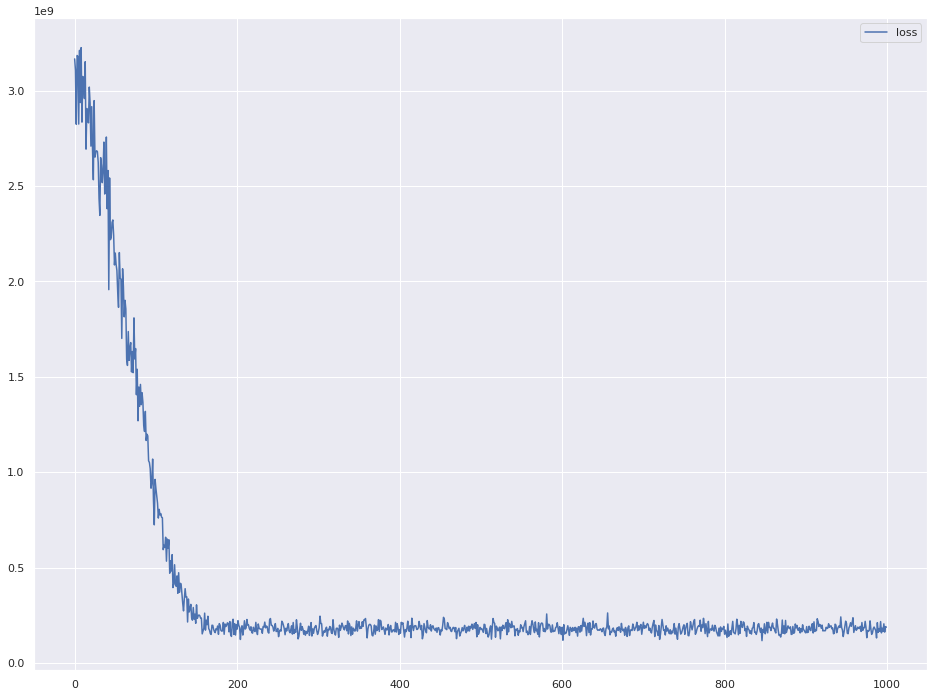

In [38]:
plot_history(history, offset=0, metrics=['loss'])

In [39]:
results = forecast(model)

ValueError: in user code:

    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1569 predict_function  *
        return step_function(self, iterator)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1552 run_step  **
        outputs = model.predict_step(data)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1525 predict_step
        return self(x, training=False)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/ab/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:215 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 12)


# Addendum

In [23]:
# tf.keras.backend.clear_session()
# model = tf.keras.models.Sequential([
#  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
#  strides=1, padding='causal',
#  activation='relu',
#  input_shape=[None, 1]),
#  tf.keras.layers.LSTM(32, return_sequences=True),
#  tf.keras.layers.LSTM(32, return_sequences=True),
#  tf.keras.layers.Dense(30, activation='relu'),
#  tf.keras.layers.Dense(10, activation='relu'),
#  tf.keras.layers.Dense(1),
# ])
# model.summary()